## Task 1

#### A) Import all the required modules.Store the data into pandas dataframe and call it df_marketing.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn import metrics
from sklearn.linear_model import SGDRegressor,LinearRegression

C:\Users\ujjwa\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
pd.options.display.max_rows = 205
# reading the csv file
df_marketing = pd.read_csv("SalesBasedOnAdvertising.csv")
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,NaN,34.5,48.9
1,2,230.1,37.8,69.2,22.1
2,3,44.5,39.3,45.1,10.4
3,4,17.2,45.9,69.3,9.3
4,5,151.5,41.3,58.5,18.5


## -----------------------------------------------------------------------------------------------------------------------------##

#### b) Analyze the shape of the Data using df_makreby checking the no. of rows and columns available

In [3]:
# No of Rows
total_rows=df_marketing.shape[0]
# No of Columns
total_columns=df_marketing.shape[1]
print("The numbers of the entries are: {} and total numbers of columns are: {}".format(total_rows,total_columns))

The numbers of the entries are: 204 and total numbers of columns are: 5


## -----------------------------------------------------------------------------------------------------------------------------##

#### c) Check the basic statistics of the given parameters and also look into the type of the data. Describe the Dataset in your words including the columns, their type, ranges and other stats.

In [4]:
df_marketing.dtypes

Sno            int64
TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

### Ans - Observations

We can see that the data in the columns is of float type.


In [5]:
df_marketing.describe()

,Sno,TV,radio,newspaper,sales
count,204.000000,204.000000,203.000000,204.000000,204.000000
mean,102.500000,146.602451,23.122167,30.712255,14.020588
std,59.033889,86.062496,14.810692,21.731852,5.905251
min,1.000000,0.000000,0.000000,0.300000,0.000000
25%,51.750000,72.700000,9.950000,12.875000,10.250000
50%,102.500000,149.750000,22.300000,26.050000,12.900000
75%,153.250000,218.625000,36.400000,45.100000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


### Ans - Observations

So looking the data that we got after performing simple statistics we can see that the **Average Sale of the mart is 14.02 lakh rupees**.The **Minimum amount spent for the advertisment through Television , Radio, Newspaper is 0, 0, 300 Rs respectively**. Investigating this minimum amount fact we can see that advertisment through the newpaper is always considered against advertisment through the TV and Radio.

##### In short

**Mean Sale** - 14.02 Lakh Rs

**Range** 0 - 49 Lakh Rs

**Std Deviation** - 5.9 (Data flucates to a great extent from mean).

## -----------------------------------------------------------------------------------------------------------------------------##

#### d) Next check if there is any Null/character type data in the given data.

If any Sales data is Null or contain value 0, drop the complete row.



For any other column, fill those cell with the average value for those columns.

In [6]:
# Dropping the row with the sales value 0.0
df_marketing = df_marketing[df_marketing.sales != 0.0]

In [7]:
# Checking is there exist any NaN value
flag = df_marketing.isnull().values.any()
print("Is there exist any Nan value - {}".format(flag))

Is there exist any Nan value - True


In [8]:
# Replacing the NaN values with the average value.
df_marketing=df_marketing.fillna(df_marketing.mean())
df_marketing

,Sno,TV,radio,newspaper,sales
0,1,219.0,23.247761,34.5,48.9
1,2,230.1,37.800000,69.2,22.1
2,3,44.5,39.300000,45.1,10.4
3,4,17.2,45.900000,69.3,9.3
4,5,151.5,41.300000,58.5,18.5
5,6,180.8,10.800000,58.4,12.9
6,7,8.7,48.900000,75.0,7.2
7,8,57.5,32.800000,23.5,11.8
8,9,120.2,19.600000,11.6,13.2
9,10,8.6,2.100000,1.0,4.8


## -----------------------------------------------------------------------------------------------------------------------------##

#### e)  Once again perform the  Task b) and c) to check the shape and statistics of the data. Explain the changes.

In [9]:
# No of Rows
total_rows=df_marketing.shape[0]
# No of Columns
total_columns=df_marketing.shape[1]
print("The numbers of the entries are: {} and total numbers of columns are: {}".format(total_rows,total_columns),"\n")
df_marketing.describe()

The numbers of the entries are: 202 and total numbers of columns are: 5 



,Sno,TV,radio,newspaper,sales
count,202.000000,202.000000,202.000000,202.000000,202.000000
mean,102.425743,147.710396,23.247761,30.516337,14.159406
std,59.310021,85.689200,14.774545,21.687071,5.765728
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,51.250000,74.800000,10.025000,12.825000,10.325000
50%,102.500000,150.650000,22.873881,25.750000,12.900000
75%,153.750000,218.875000,36.450000,44.900000,17.400000
max,204.000000,296.400000,49.600000,114.000000,48.900000


### Ans - Observations

We can see that previously **there were 204 rows and 5 coloumn but after applying the filters now it become 202 which means 2 rows are wiped off.** 
Also we can see that now the **minimum of Sales and the T.V has changed to 1.6 Lakh Rs and 700 Rs, so as the range**.

The new Sales range is **1.6 - 49 Lakh Rs**.


## -----------------------------------------------------------------------------------------------------------------------------##

## Task 2 
#### a) Create the Box-plot of all the numeric columns and explain the result in your words.

Text(0.5,1,'Expense plot for Tv')

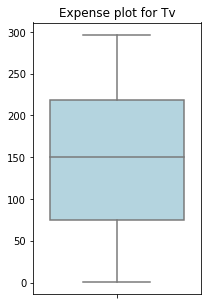

In [10]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(y=["TV"], data=df_marketing,color = "lightblue")
plt.title("Expense plot for Tv")

### Ans - Observations

#### Description - TV

The Box plot we plotted shows that the **range of amount spent on the advertisment through TV vary from 0 - 3 Lakh Rs**. Looking the plot we can see that the **data is equally distributed along the median value which is approximately at the 1.5 Lakh Rs**. **Also 50 % of data is in the range 75 Thousand Rs to 2.25 Lakh Rs.** which means Advertisment through TV cost much expense in advertisment bugdet of the BigMart.

Text(0.5,1,'Expense plot for Radio')

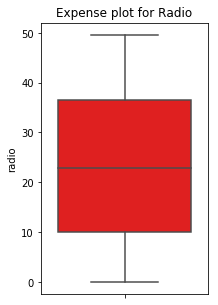

In [11]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(y="radio", data=df_marketing,color = "Red")
plt.title("Expense plot for Radio")

### Ans - Observations

#### Description - Radio

The Box plot we plotted shows that the **range of amount spent on the advertisment through Radio vary from 0 - 50 Thousand Rs** **Also most of the data is in the range 10 Thousand Rs to 36 Thousand Rs.** which means Advertisment through radio cost less than that of TV expense in bugdet of the BigMart.

Text(0.5,1,'Expense plot for NewsPaper')

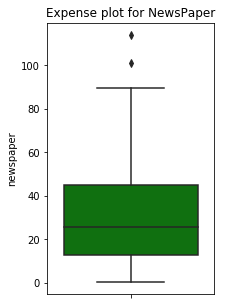

In [12]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(y="newspaper", data=df_marketing,color = "Green")
plt.title("Expense plot for NewsPaper")

### Ans - Observations

#### Description - Newspaper

The Box plot we plotted shows that the **range of amount spent on the advertisment through newspaper vary from 0 - 90 Thousand Rs**, with outliers at 1.14 Lakh Rs. **Also most of the data is in the range 10 Thousand Rs to 45 Thousand Rs.** which means Advertisment through newspaper cost less than that of TV expense but more than Radio in bugdet of the BigMart.

Text(0.5,1,'Plot for Total Sales')

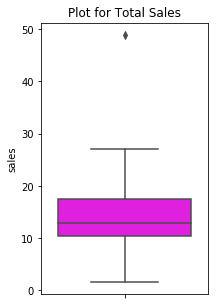

In [13]:
plt.figure(figsize=(3,5))
ax = sns.boxplot(y="sales", data=df_marketing,color = "Magenta")
plt.title("Plot for Total Sales")

### Ans - Observations

#### Description - Sales

The Box plot we plotted shows that the **range of Sales vary from 1 Lakh Rs - 28 Lakh rs with the expection of 48 Lakh rs Once**. **Median shows that the data is more centralized in the 3rd quarter which means average sale is 14 Lakh RS**

## -----------------------------------------------------------------------------------------------------------------------------##

#### b) Next you need to create a figure and create two subplots(contained in the same row) on it with the following details -

#### First subplot will show the Box plot of Sales, tv, radio and newpapers columns


#### Create Line plot of all the 4 columns Sales, tv, radio and newpapers using panadas.dataframe.data.plot method, on the Second subplot. Use different colours for different columns.
Both the subplots should have the appropriate labels for X and Y values and title

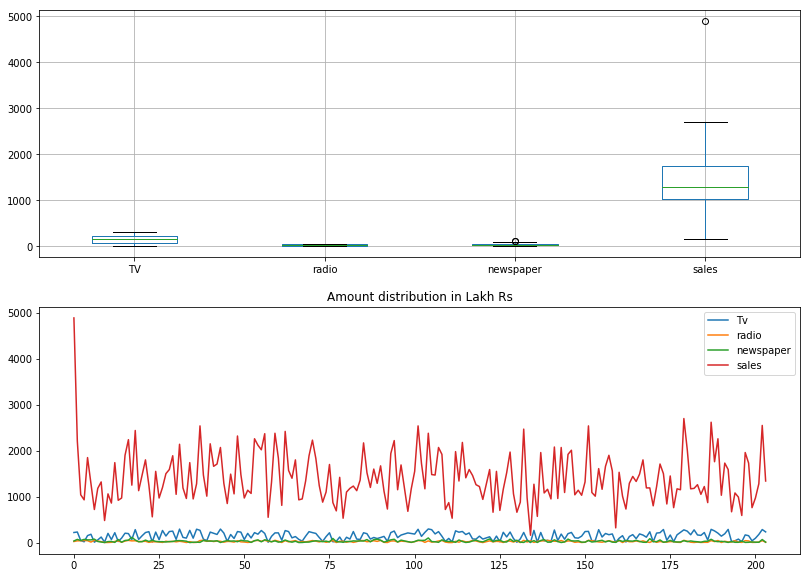

In [14]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.add_subplot(221)

# Converting sales in Thousand Rs
sales = df_marketing['sales']*100

df = pd.DataFrame(data = df_marketing, columns = ['TV','radio','newspaper'])

df['sales'] = sales

df.boxplot()
ax2 = fig.add_subplot(223)
ax2.plot(df)
plt.title("Amount distribution in Lakh Rs")
ax2.legend(('Tv', 'radio', 'newspaper','sales'))
plt.show()

In [15]:
df_marketing.head()

,Sno,TV,radio,newspaper,sales
0,1,219.0,23.247761,34.5,48.9
1,2,230.1,37.800000,69.2,22.1
2,3,44.5,39.300000,45.1,10.4
3,4,17.2,45.900000,69.3,9.3
4,5,151.5,41.300000,58.5,18.5


## -----------------------------------------------------------------------------------------------------------------------------##

## Task 3 
#### a) In order to predict the Sales based on Marketing expenses, find out the possible independent and dependent variables from the given Dataset. You can suggest different models (max. Up to 3) and explain any one of your model.

### Ans - Observation

Well looking to all the **line plots we plotted the series seems Stationary**. I have **checked the dynamic mean and dynamic standard deviation with windows rolling size 12 in background and confirmed that as well**. 
Talking about the dependent and independent variable **we can easily figured that sales is only dependent variable and all the other columns are independent variable**

## -----------------------------------------------------------------------------------------------------------------------------##

#### b) Now, you would have already figured out that Sales is your dependent variable for which you are going to create your model. Lets Create the distribution plot along with kde plot for the Sales data and explain it in your words.

C:\Users\ujjwa\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Sales Data in Lakh Rs')

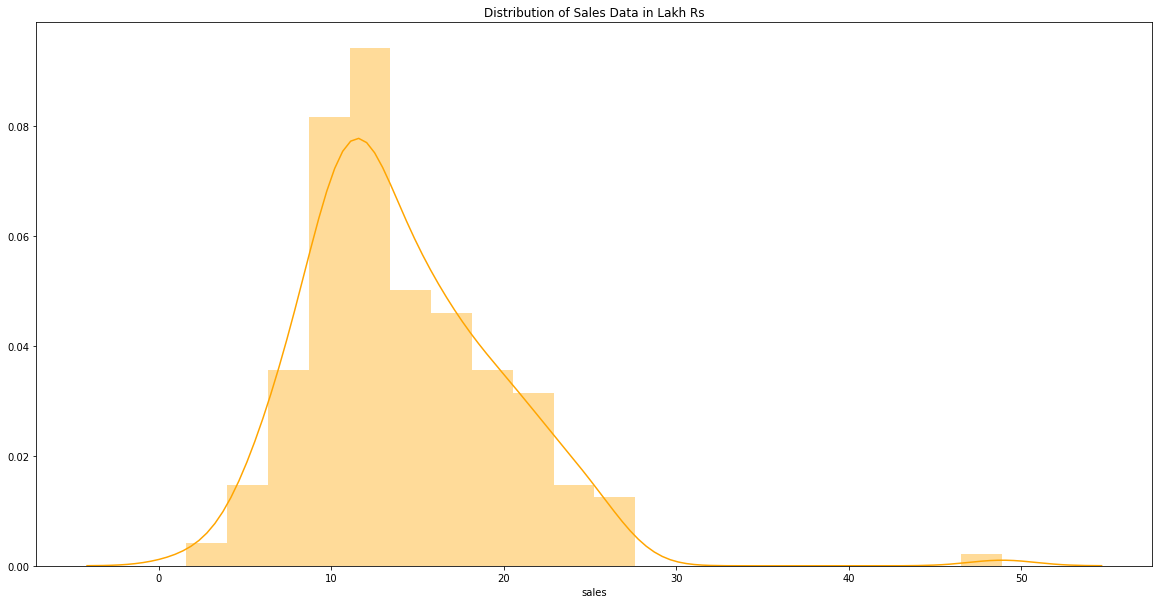

In [16]:
fig,ax = plt.subplots(figsize=(20,10))
sns.distplot(df_marketing['sales'],color='Orange')
plt.title("Distribution of Sales Data in Lakh Rs")

### Ans - Observation

The Kde plot or we can say the distribution plot we plotted shows **the distribution of the sales data in the range of 5 - 28 Lakh Rs with a outlier of 48 Lakh Rs**. Also most of the data **is in between 10 - 15 Lakh Rs that is where our average is present.**

## -----------------------------------------------------------------------------------------------------------------------------##

## Task 4

#### Next task is to see the distribution of different parameters along with Sales. For this we will use Scatter Plot.



#### a) Create the Scatter plot using the dataframe plot function keeping the Sales on Y-axis and expenditure on tv on x-axis.

#### b) Create 3 subplots (in a single row) in a figure for the following -



**Sales vs TV Advertising**

**Sales vs Radio Advertising**

**Sales vs NewsPaper Advertising**

#### The points should be of seagreen, darkgreen and black colours respectively


#### Provide the appropriate labels for x and y axis and name of the graphs.**

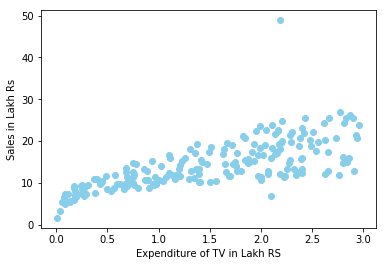

In [17]:
x = df_marketing['TV']/100
y = df_marketing['sales']
plt.scatter(x,y,color='SKYblue')
plt.ylabel("Sales in Lakh Rs")
plt.xlabel("Expenditure of TV in Lakh RS")
plt.show()

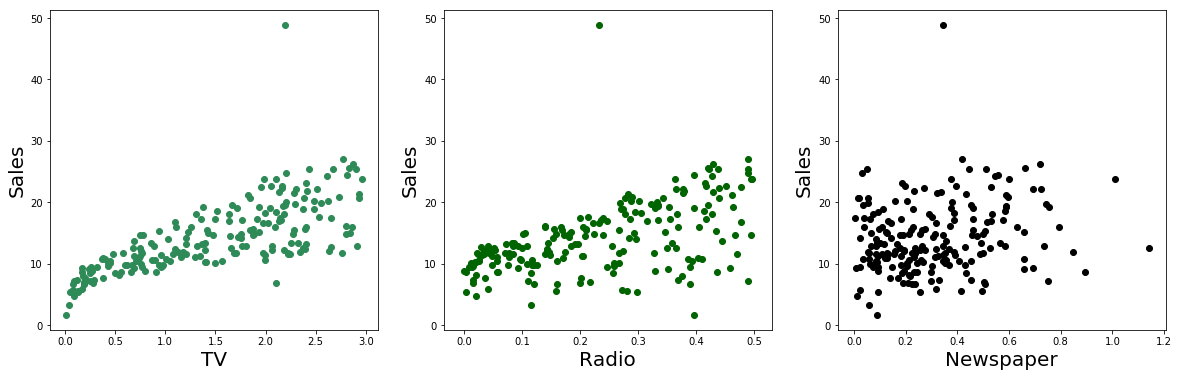

In [18]:
fig = plt.figure(figsize=(20,20))

ax1=fig.add_subplot(331)
x = df_marketing['TV']/100
y = df_marketing['sales']
plt.scatter(x,y,color='seagreen')

x = df_marketing['radio']/100

ax2=fig.add_subplot(332)
plt.scatter(x, y, color='darkgreen')

x = df_marketing['newspaper']/100
ax3=fig.add_subplot(333)
plt.scatter(x, y, color='black')

ax1.set_xlabel("TV",fontsize=20)
ax1.set_ylabel("Sales",fontsize=20)
ax1.tick_params(labelsize=10)

ax2.set_xlabel("Radio",fontsize=20)
ax2.set_ylabel("Sales",fontsize=20)
ax2.tick_params(labelsize=10)

ax3.set_xlabel("Newspaper",fontsize=20)
ax3.set_ylabel("Sales",fontsize=20)
ax3.tick_params(labelsize=10)

plt.show()

## -----------------------------------------------------------------------------------------------------------------------------##

#### c) Create the pairplot for Sales with different marketing expenses using seaborn.

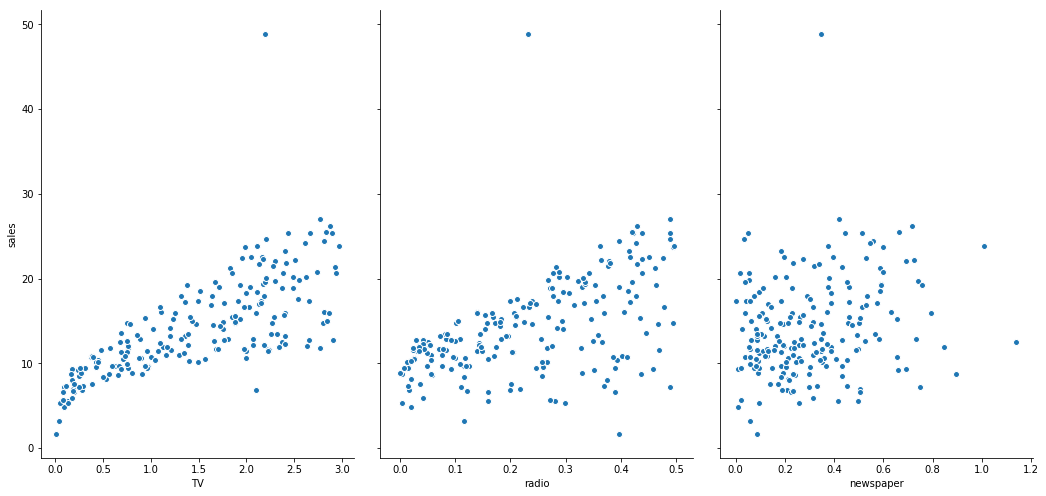

In [19]:
df = df_marketing

# Changing the column units to lakh rs
df['TV'] = df_marketing['TV']/100
df['radio'] = df_marketing['radio']/100
df['newspaper'] = df_marketing['newspaper']/100

sns.pairplot(data = df , x_vars=['TV','radio','newspaper'], y_vars='sales',size=7,aspect=0.7)

## -----------------------------------------------------------------------------------------------------------------------------##

## Task 5 
#### a) Add a new column “TotalAdvt” to the dataframe df_marketing, which will have the total of all the three marketing expenditures (tv, radio and news-paper)

In [20]:
# Adding the TotalAdvt in Lakh rs
df_marketing['TotalAdvt'] = df_marketing['TV'] + df_marketing['radio'] + df_marketing['newspaper']
df_marketing.head()

,Sno,TV,radio,newspaper,sales,TotalAdvt
0,1,2.190,0.232478,0.345,48.9,2.767478
1,2,2.301,0.378000,0.692,22.1,3.371000
2,3,0.445,0.393000,0.451,10.4,1.289000
3,4,0.172,0.459000,0.693,9.3,1.324000
4,5,1.515,0.413000,0.585,18.5,2.513000


## -----------------------------------------------------------------------------------------------------------------------------##

#### b) Fit a Simple Linear Regression for Sales and  TotalAdvt and find out the values of intercept slope and the R-square value. Describe the model in your terms. The model should be named simple_model.

In [21]:
y=df_marketing['sales']
x=df_marketing['TotalAdvt'].values.reshape(-1,1)

In [22]:
# Creating the linear regression model object
simple_model = linear_model.LinearRegression()
simple_model.fit(x,y)

#for value of R-square
simple_model.score(x,y) 

0.6411334702839222

In [23]:
#value of slope
simple_model.coef_   

array([4.9782741])

In [24]:
#intercept value
simple_model.intercept_ 

4.129453401328462

## -----------------------------------------------------------------------------------------------------------------------------##

#### c) What will be the Sales using the above Model if total expenditure on advertisements is Rupees 50,000. Show the steps done to find out the Sales value. (write the mathematical equation used )

In [25]:
# Steps
# 1 Find the slope (m) and the value of X
# 2 Find the intercept(c)
# 3 Apply the formula (y = mx+c)

# Converted the given expenditure in Lakh Rs
total_sales = 4.9782741*0.5 + 4.1294534

print("Total Sales at 50000 Rs Advertisment-",total_sales)  

Total Sales at 50000 Rs Advertisment- 6.61859045


## -----------------------------------------------------------------------------------------------------------------------------##

#### d) Perform part c) using the predict method for the model created in part b)

In [26]:
print("Total Sales using the Predict Model at 50000 Rs Advertisment-",simple_model.predict(0.5))

Total Sales using the Predict Model at 50000 Rs Advertisment- [6.61859045]


### Ans - Observations

Here **we can verify the equation we created and the result from the predict method both are exactly same hence the Model created is perfectly fine**

## -----------------------------------------------------------------------------------------------------------------------------##

## Task 6

#### In this section, we will create a different model to see the impact of different marketing expenditures on Sales. For this we will use advertising on tv, radio and news-paper as separate variables or independent variables.

#### a) Fit a Simple Linear Regression for Sales while keeping tv, radio and newspaper as three different x-parameters. The model should be named multi_model.

In [27]:
y=df_marketing['sales']
x_TV=df_marketing['TV']
x_Radio=df_marketing['radio']
x_Newspaper=df_marketing['newspaper']

In [28]:
multi_model=linear_model.LinearRegression()

In [29]:
# Vertical stacking the independent variables all together
x4 = np.vstack((x_TV,x_Radio,x_Newspaper))
x4 = x4.T

In [30]:
multi_model.fit(x4,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
multi_model.score(x4,y)

0.7545163072955382

In [32]:
multi_model.coef_

array([ 4.68636807, 18.76042293,  0.14346244])

In [33]:
multi_model.intercept_

2.8319952964638393

### Ans - Observations

We created the multi model keeping all the three independent variable in mind and the equation now formed is

**y = 4.68636807 \* X_TV + 18.76042293 \* X_Radio + 0.14346244 \* X_Newspaper + 2.831995296**

## -----------------------------------------------------------------------------------------------------------------------------##

#### b) Write the Mathematical equation for Sales for this Model. Predict Sales for the below mentioned Expenditures

#### i) tv 90000, radio 3000 and newspaper 45000

#### ii) tv 290000 and newspaper 80000

Explain your answers in words



In [34]:
# i) tv 90000, radio 3000 and newspaper 45000
y = (4.68636807 * 0.9) + (18.76042293 * 0.03) + (0.14346244 * 0.45) + 2.831995296
print("Total Sales with the given value -",y)

Total Sales with the given value - 7.6770973449


In [35]:
# ii) tv 290000 and newspaper 80000
y = (4.68636807 * 2.9) + (0.14346244 * 0.8) + 2.831995296
print("Total Sales with the given value -",y)

Total Sales with the given value - 16.537232651


## -----------------------------------------------------------------------------------------------------------------------------##

#### c) Perform part b) using  the predict method for the model.

In [36]:
# i) tv 90000, radio 3000 and newspaper 45000
x = np.vstack(( 0.9 , 0.03 , 0.45 ))
# Transposing the matrix
x = x.T
print("Total Sales using the Predict Model at 50000 Rs Advertisment-",multi_model.predict(x))

Total Sales using the Predict Model at 50000 Rs Advertisment- [7.67709735]


In [37]:
# ii) tv 290000 and newspaper 80000
x = np.vstack(( 2.9 , 0, 0.8 ))
# Transposing the matrix
x = x.T
print("Total Sales using the Predict Model at 50000 Rs Advertisment-",multi_model.predict(x))

Total Sales using the Predict Model at 50000 Rs Advertisment- [16.53723266]


## -----------------------------------------------------------------------------------------------------------------------------##

#### d) Compare the result in part b) and c)

### Ans - Observations

Well we can see that the **results are exactly same as calculated using the formula as well as calculated using the predict method hence the equation we created is perfect.**

## -----------------------------------------------------------------------------------------------------------------------------##

## Task 7
#### As part of task 5) and 6) we created two different models. Compare the two models (simple_model and  multi_model) by calculating the Error in the Models. Explain which model is better and why?

#### a) For both the simple regression model (stored in simple_model) and Multi-variate model (stored in multi_model) find out the predicted value of Y, for the given  X-values and store it in simple_y and multi_y.

In [38]:
# With the given data 1 --> tv 90000, radio 3000 and newspaper 45000
simple_y = simple_model.predict(1.38)
simple_y

array([10.99947165])

In [39]:
# With the given data 1 --> tv 90000, radio 3000 and newspaper 45000
x = np.vstack(( 0.9 , 0.03 , 0.45 ))
x = x.T
multi_y = multi_model.predict(x)
multi_y

array([7.67709735])

## -----------------------------------------------------------------------------------------------------------------------------##

#### b) Find out the Mean Squared Error, using the metrics module of sklearn, for both the models (using actual and predicted values of Sales). Store the result in simple_mse and multi_mse respectively

#### Simple Model

In [40]:
actual_y = 4.9782741 * 1.38 + 4.1294534
actual_y

10.999471658000001

In [41]:
actual_y = [10.999471658000001]

In [42]:
predicted_simple_y = [10.99947165]
predicted_simple_y

[10.99947165]

In [43]:
simple_mse = metrics.mean_squared_error(actual_y,predicted_simple_y)
simple_mse

6.400001059076793e-17

#### Multi Model

In [44]:
actual_y = (4.68636807 * 0.9) + (18.76042293 * 0.03) + (0.14346244 * 0.45) + 2.831995296
actual_y = [7.6770973449]

In [45]:
predicted_mutli_y = [7.67709735]
predicted_mutli_y

[7.67709735]

In [47]:
multi_mse = metrics.mean_squared_error(actual_y,predicted_mutli_y)
multi_mse

2.6010004304154277e-17

## -----------------------------------------------------------------------------------------------------------------------------##

#### c) Explain the result in step b) in your words describing which model is better and why?

### Ans - Observation
We have successfully checked the value of the mean squared error and **found that the MME model is very much precise than the MSE model hence Mr. Roy should go for the multi model to find the fine results and generate the better predictions of the sales.**.